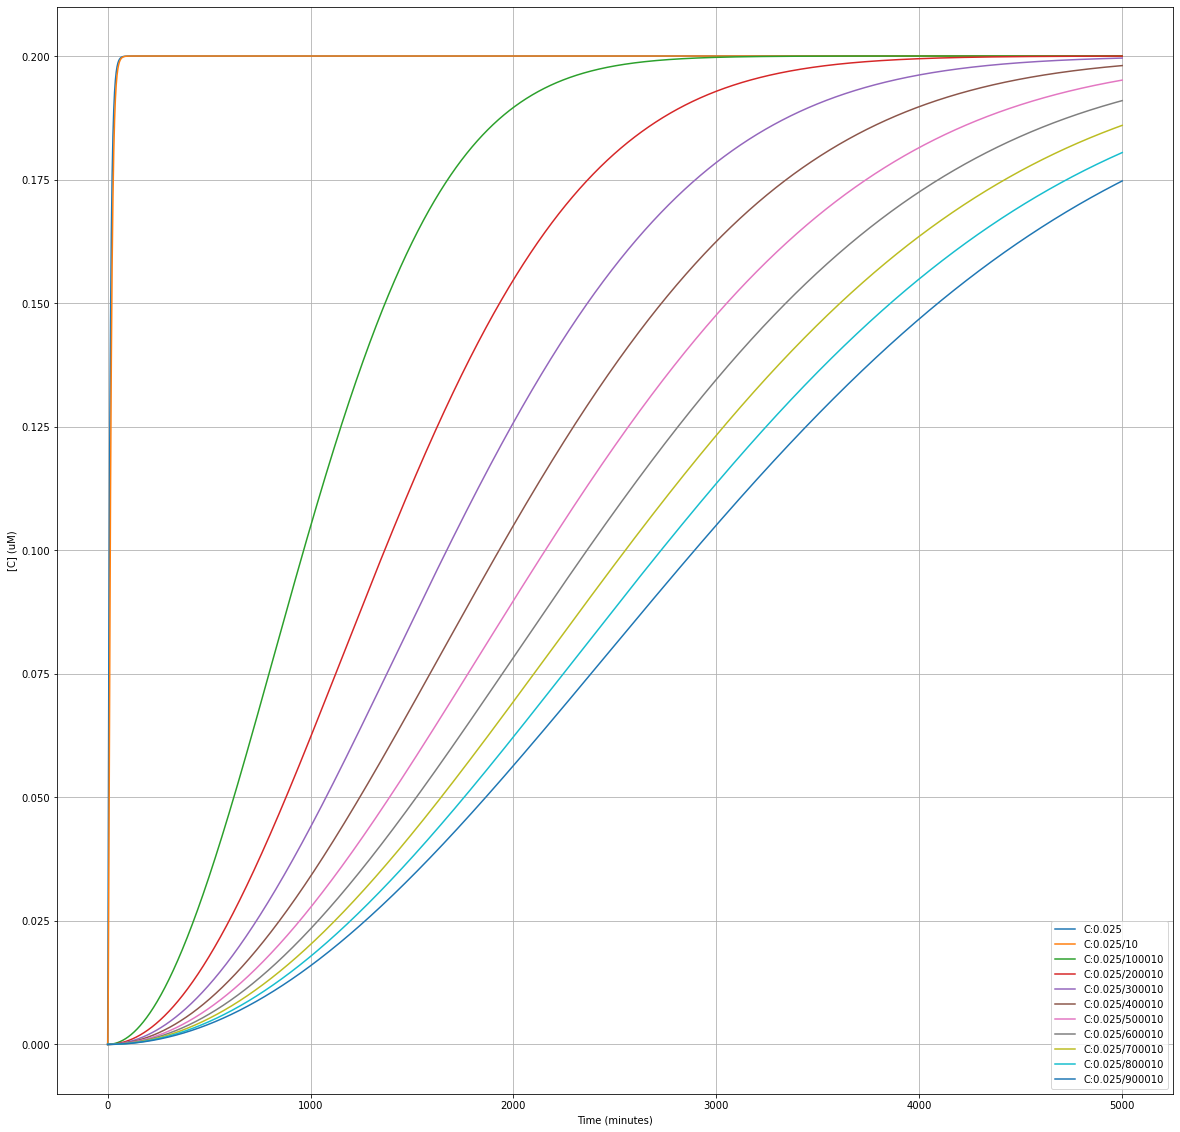

In [3]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


# Catalyst + H1 -> CH1 (k1)
# H2 + CH1 -> CH1H2 + Catalyst (k2)
#CH1CH2 +RP-> RF+ RQ (k3)


#function to solve differential equations of the system
def cha(y, t, k1, k2, k3):
    ca, h1, ch1, h2, ch1h2, rp, rf = y
    dydt =  [-k1*ca*h1+ k2*h2*ch1, -k1*ca*h1, k1*ca*h1-k2*h2*ch1, -k2*h2*ch1, k2*h2*ch1, -k3*rp*ch1h2, k3*rp*ch1h2]
    return dydt

#Plottingfunction
def plottingfunction(y0,t,cha):
    for i in range(10,1000000+1,100000):
        y = [0.025/i,0.2,0.0,0.2,0.0,0.2,0.0]
        soli = odeint(cha, y, t, args=(1398.5999999999985, 62.400000000000006, 0.5))
        lrfi="C:0.025/"+str(i)
        plt.plot(t, soli[:, 6], label = lrfi)

#Set the initial concentration [ca, h1, ch1, h2, ch1h2, rp, rf]
y0 = [0.025,0.2,0.0,0.2,0.0,0.2,0.0]

#Set time scale
t = np.linspace(0, 5000, 5000)

#Label for graphs
lca = "CAT(t)"
lh1 = "H1(t)"
lch1 = "CH1(t)"
xla = "Time (minutes)"
yla = "[C] (uM)"
lh2 = "H2(t)"
lch1h2 = "CH1H2(t)"
lrp = "RP(t)"
lrf = "C:0.025"

#Plottingbaseconcentrationcase
sol = odeint(cha, y0, t, args=(1398.5999999999985, 62.400000000000006, 0.5))
plt.figure(figsize=(20,20))
plt.plot(t, sol[:, 6], label = lrf)
plt.xlabel(xla)
plt.ylabel(yla)
plt.grid()


#callplottingfunction
plottingfunction(y0,t,cha)
plt.legend(loc='best')
plt.savefig("ModelPLot3.pdf")
plt.show()


